In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Data reading

In [2]:
data = pd.read_csv('full_data_flightdelay.csv')
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

# Missing value checking

In [4]:
data.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [5]:
data.isna().sum().sum()

0

# Data overview

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,6489062.0,6.607062e+00,3.396853e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
DAY_OF_WEEK,6489062.0,3.935598e+00,1.995200e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DEL15,6489062.0,1.891441e-01,3.916231e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,6489062.0,3.821102e+00,2.382233e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,6489062.0,3.046890e+00,1.757864e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,6489062.0,2.783675e+01,2.151060e+01,1.000000,1.100000e+01,2.300000e+01,3.900000e+01,1.090000e+02
NUMBER_OF_SEATS,6489062.0,1.337397e+02,4.645213e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
AIRPORT_FLIGHTS_MONTH,6489062.0,1.268458e+04,8.839796e+03,1100.000000,5.345000e+03,1.156200e+04,1.761500e+04,3.525600e+04
AIRLINE_FLIGHTS_MONTH,6489062.0,6.296058e+04,3.438223e+04,5582.000000,2.503400e+04,7.087800e+04,8.631200e+04,1.177280e+05
AIRLINE_AIRPORT_FLIGHTS_MONTH,6489062.0,3.459251e+03,4.251139e+03,1.000000,6.540000e+02,2.251000e+03,4.806000e+03,2.183700e+04


# Checking for correlation to Delay

In [7]:
correlation = data.corr()['DEP_DEL15'].sort_values(ascending=False)
correlation

DEP_DEL15                        1.000000
SEGMENT_NUMBER                   0.117528
PRCP                             0.080277
AWND                             0.050947
SNOW                             0.050156
LONGITUDE                        0.027097
AIRPORT_FLIGHTS_MONTH            0.026740
SNWD                             0.026129
AVG_MONTHLY_PASS_AIRPORT         0.024383
DISTANCE_GROUP                   0.016289
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.013711
NUMBER_OF_SEATS                  0.011845
CONCURRENT_FLIGHTS               0.009028
PLANE_AGE                        0.006220
AIRLINE_FLIGHTS_MONTH            0.003528
AVG_MONTHLY_PASS_AIRLINE         0.001257
LATITUDE                         0.000490
DAY_OF_WEEK                     -0.000199
FLT_ATTENDANTS_PER_PASS         -0.002114
TMAX                            -0.008936
GROUND_SERV_PER_PASS            -0.016736
MONTH                           -0.019049
Name: DEP_DEL15, dtype: float64

In [8]:
data.shape

(6489062, 26)

# Data normalization

In [9]:
data = data.drop(['PREVIOUS_AIRPORT'],axis=1)
data = data.drop(['DEPARTING_AIRPORT'],axis=1)

In [10]:
nominals = ['DEP_TIME_BLK','CARRIER_NAME','DEPARTING_AIRPORT']
data = pd.get_dummies(data)

In [11]:
scaler = MinMaxScaler()
model = scaler.fit(data)
scaled = model.transform(data)

In [13]:
data_scaled = pd.DataFrame(scaled, index=data.index, columns=data.columns)

In [14]:
X = data_scaled.drop(['DEP_DEL15'],axis=1)
Y = data_scaled['DEP_DEL15']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=4)

In [16]:
labels = ['False','True']

# LogisticRegression

In [17]:
# create logistic regressor
logistic_regressor = LogisticRegression()

start = time.time()

# fit
logistic_regressor.fit(x_train, y_train)

end = time.time()
print('LogisticRegression time: ')
print((end - start))

# predict
logistic_pred = logistic_regressor.predict(x_test)

C:\Users\musta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression time: 
71.77214050292969


In [18]:
logistic_regressor.score(x_test, y_test)

0.8107319027678738

In [21]:
logistic_regressor_confusion_matrix = confusion_matrix(y_test, logistic_pred)

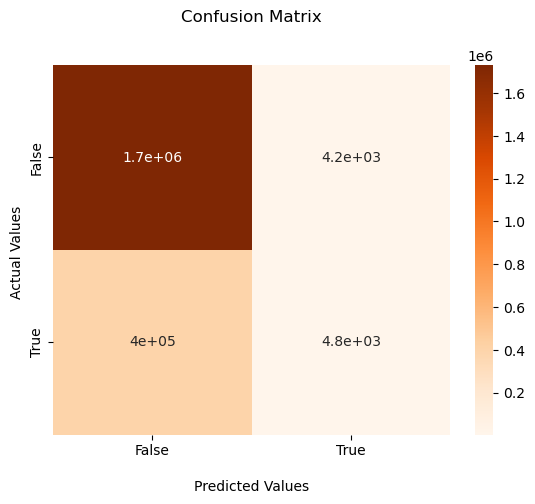

In [22]:
ax = sns.heatmap(logistic_regressor_confusion_matrix, annot=True, cmap='Oranges')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [23]:
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90   1735526
         1.0       0.53      0.01      0.02    405865

    accuracy                           0.81   2141391
   macro avg       0.67      0.50      0.46   2141391
weighted avg       0.76      0.81      0.73   2141391



In [24]:
print(logistic_regressor_confusion_matrix)

[[1731326    4200]
 [ 401097    4768]]
